In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import googlemaps
import requests
import json
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
def load_api(path="confidential.json"):
	with open(path) as f:
		data = json.load(f)
	return data.get("api_key", "API key not found")
	
api_key = load_api()

In [3]:
# zip_tract = pd.read_excel("D:\Download\HVIprediction\ZIP_TRACT_122024.xlsx")
# zip_tract = zip_tract[zip_tract['USPS_ZIP_PREF_STATE'] == 'NJ']
# zip_tract.to_csv("D:\Download\HVIprediction\ZIP_TRACT_122024_NJ.csv", index=False)

In [4]:
zip_tract = pd.read_csv("D:\Download\HVIprediction\data\ZIP_TRACT_122024_NJ.csv")
# zip_tract = zip_tract.sort_values(by=['TRACT', 'RES_RATIO'], ascending=[True, False])
# zip_tract = zip_tract.drop_duplicates(subset='TRACT', keep='first')
# zip_tract = zip_tract[['TRACT', 'ZIP']]
# zip_tract = zip_tract.rename(columns={'TRACT': 'GEOID', 'ZIP': 'ZCTA'})
# zip_tract.to_csv("D:\Download\HVIprediction\data\ZIP_TRACT_122024_NJ.csv", index=False)

In [5]:
nj_hvi = pd.read_csv('data/nj_hvi.csv')

In [6]:
nj_hvi = nj_hvi.merge(zip_tract, on=['GEOID', 'ZCTA'], how='inner')
nj_hvi.head()

,Adaptive_Capacity_Scale,Annual_PM25_Concentration,Asthma_Prevalence,CoronaryHeartDisease_Prevalence,COUNTYFP,Diabetes_Prevalence,Exposure_Scale,GEOID,HVI_Category,HVI_Scale,Impervious_to_Canopy_Ratio,NAME,NAMELSAD,O3_Exceedance_Days,ObjectID,Percent_Below_PovertyLine,Percent_Linguistic_Isolation,Percent_NoHealth+V1Insurance,Percent_Aged_Above_65,Percent_Aged_Below_5,Percent_with_Disability,Percent_Homes_Built_before_1960,Percent_in_Outdoor_Occupations,Percent_Living_Alone,Percent_NonWhite,Percent_Unemployed,Percent_without_HighSchoolDiploma,Sensitivity_Scale,STATEFP,Tract_Summ,TRACTCE,Shape__Area,Shape__Length,OBJECTID_1,ZCTA,Lat,Lon
0,1,2,3,1,31,1,1,34031256804,Low,1,1,2568.04,Census Tract 2568.04,2,1396,1,1,3,3,2,2,2,2,1,1,2,1,1,34,1,256804,"53,904,326.71","39,088.52",1,7480,41.098546,-74.393934
1,4,2,3,3,31,2,1,34031246300,Moderate,3,2,2463.00,Census Tract 2463,2,1836,4,3,4,2,3,2,3,4,3,3,4,3,3,34,1,246300,"18,543,764.50","32,287.12",2,7470,40.941149,-74.253146
2,5,2,5,3,31,5,3,34031181200,Moderate_High,4,5,1812.00,Census Tract 1812,2,1743,5,5,5,1,5,1,4,5,1,5,4,5,4,34,3,181200,"704,177.54","3,557.55",3,7514,40.923473,-74.144549
3,2,2,3,5,31,3,1,34031256803,Low,1,1,2568.03,Census Tract 2568.03,2,1402,2,2,3,5,4,1,2,3,5,2,1,2,3,34,1,256803,"26,408,937.79","30,301.58",4,7480,41.098546,-74.393934
4,1,2,2,3,31,2,1,34031246003,Low,1,2,2460.03,Census Tract 2460.03,2,1395,1,3,1,4,5,2,3,2,1,2,2,2,2,34,1,246003,"14,709,914.19","20,129.26",5,7470,40.941149,-74.253146


In [7]:
gmaps = googlemaps.Client(key=api_key)
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

def location_retrieve(zipcode, state):
    """Retrieve latitude and longitude for a given ZIP code with caching to reduce API calls."""    
    endpoint = f"{base_url}?components=country=us&address={zipcode},{state}&key={api_key}"
    response = requests.get(endpoint).json()
    if 'results' in response and response['results']:
        return response['results'][0]['geometry']['location']['lat'], response['results'][0]['geometry']['location']['lng']
    return None, None

In [8]:
# nj_hvi["ZCTA"] = nj_hvi["ZCTA"].astype(str).str.zfill(5)

# latitudes, longitudes = [], []
# for zipcode in tqdm(nj_hvi["ZCTA"], desc="Fetching geolocation data"):
#     lat, lon = location_retrieve(zipcode, "NJ")
#     latitudes.append(lat)
#     longitudes.append(lon)

# # Assign results to DataFrame
# nj_hvi["Lat"] = latitudes
# nj_hvi["Lon"] = longitudes

In [9]:
nj_hvi.head()


,Adaptive_Capacity_Scale,Annual_PM25_Concentration,Asthma_Prevalence,CoronaryHeartDisease_Prevalence,COUNTYFP,Diabetes_Prevalence,Exposure_Scale,GEOID,HVI_Category,HVI_Scale,Impervious_to_Canopy_Ratio,NAME,NAMELSAD,O3_Exceedance_Days,ObjectID,Percent_Below_PovertyLine,Percent_Linguistic_Isolation,Percent_NoHealth+V1Insurance,Percent_Aged_Above_65,Percent_Aged_Below_5,Percent_with_Disability,Percent_Homes_Built_before_1960,Percent_in_Outdoor_Occupations,Percent_Living_Alone,Percent_NonWhite,Percent_Unemployed,Percent_without_HighSchoolDiploma,Sensitivity_Scale,STATEFP,Tract_Summ,TRACTCE,Shape__Area,Shape__Length,OBJECTID_1,ZCTA,Lat,Lon
0,1,2,3,1,31,1,1,34031256804,Low,1,1,2568.04,Census Tract 2568.04,2,1396,1,1,3,3,2,2,2,2,1,1,2,1,1,34,1,256804,"53,904,326.71","39,088.52",1,7480,41.098546,-74.393934
1,4,2,3,3,31,2,1,34031246300,Moderate,3,2,2463.00,Census Tract 2463,2,1836,4,3,4,2,3,2,3,4,3,3,4,3,3,34,1,246300,"18,543,764.50","32,287.12",2,7470,40.941149,-74.253146
2,5,2,5,3,31,5,3,34031181200,Moderate_High,4,5,1812.00,Census Tract 1812,2,1743,5,5,5,1,5,1,4,5,1,5,4,5,4,34,3,181200,"704,177.54","3,557.55",3,7514,40.923473,-74.144549
3,2,2,3,5,31,3,1,34031256803,Low,1,1,2568.03,Census Tract 2568.03,2,1402,2,2,3,5,4,1,2,3,5,2,1,2,3,34,1,256803,"26,408,937.79","30,301.58",4,7480,41.098546,-74.393934
4,1,2,2,3,31,2,1,34031246003,Low,1,2,2460.03,Census Tract 2460.03,2,1395,1,3,1,4,5,2,3,2,1,2,2,2,2,34,1,246003,"14,709,914.19","20,129.26",5,7470,40.941149,-74.253146


In [10]:
print(nj_hvi.shape)
nj_hvi.columns

(1818, 37)


Index(['Adaptive_Capacity_Scale', 'Annual_PM25_Concentration',
       'Asthma_Prevalence', 'CoronaryHeartDisease_Prevalence', 'COUNTYFP',
       'Diabetes_Prevalence', 'Exposure_Scale', 'GEOID', 'HVI_Category',
       'HVI_Scale', 'Impervious_to_Canopy_Ratio', 'NAME', 'NAMELSAD',
       'O3_Exceedance_Days', 'ObjectID', 'Percent_Below_PovertyLine',
       'Percent_Linguistic_Isolation', 'Percent_NoHealth+V1Insurance',
       'Percent_Aged_Above_65', 'Percent_Aged_Below_5',
       'Percent_with_Disability', 'Percent_Homes_Built_before_1960',
       'Percent_in_Outdoor_Occupations', 'Percent_Living_Alone',
       'Percent_NonWhite', 'Percent_Unemployed',
       'Percent_without_HighSchoolDiploma', 'Sensitivity_Scale', 'STATEFP',
       'Tract_Summ', 'TRACTCE', 'Shape__Area', 'Shape__Length', 'OBJECTID_1',
       'ZCTA', 'Lat', 'Lon'],
      dtype='object')

In [11]:
nj_hvi_num = nj_hvi.select_dtypes(include=['float64', 'int64']).drop(columns=['GEOID', 'ZCTA', 'COUNTYFP','NAME', 'ObjectID', 'STATEFP', 'Tract_Summ',	'TRACTCE', 'OBJECTID_1'])
nj_hvi_num = nj_hvi_num.replace(-999, np.nan)
nj_hvi_num = nj_hvi_num.dropna()
print(nj_hvi_num.shape)
nj_hvi_num

(1818, 24)


,Adaptive_Capacity_Scale,Annual_PM25_Concentration,Asthma_Prevalence,CoronaryHeartDisease_Prevalence,Diabetes_Prevalence,Exposure_Scale,HVI_Scale,Impervious_to_Canopy_Ratio,O3_Exceedance_Days,Percent_Below_PovertyLine,Percent_Linguistic_Isolation,Percent_NoHealth+V1Insurance,Percent_Aged_Above_65,Percent_Aged_Below_5,Percent_with_Disability,Percent_Homes_Built_before_1960,Percent_in_Outdoor_Occupations,Percent_Living_Alone,Percent_NonWhite,Percent_Unemployed,Percent_without_HighSchoolDiploma,Sensitivity_Scale,Lat,Lon
0,1,2,3,1,1,1,1,1,2,1,1,3,3,2,2,2,2,1,1,2,1,1,41.098546,-74.393934
1,4,2,3,3,2,1,3,2,2,4,3,4,2,3,2,3,4,3,3,4,3,3,40.941149,-74.253146
2,5,2,5,3,5,3,4,5,2,5,5,5,1,5,1,4,5,1,5,4,5,4,40.923473,-74.144549
3,2,2,3,5,3,1,1,1,2,2,2,3,5,4,1,2,3,5,2,1,2,3,41.098546,-74.393934
4,1,2,2,3,2,1,1,2,2,1,3,1,4,5,2,3,2,1,2,2,2,2,40.941149,-74.253146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,4,1,4,2,2,2,3,3,3,4,4,2,2,4,5,2,4,3,2,4,4,3,40.050898,-74.135741
1814,2,1,3,5,5,2,3,3,3,4,2,1,5,1,3,1,4,5,1,3,3,5,40.050898,-74.135741
1815,2,5,4,4,3,5,3,3,5,1,1,3,4,1,3,4,4,4,1,4,2,3,39.952443,-74.996854
1816,1,5,2,4,2,4,3,2,5,1,1,2,5,1,2,5,1,3,1,3,2,2,39.979090,-74.932568


In [12]:
nj_hvi_num = nj_hvi_num.rename(columns={
    'HVI_Scale': 'HVI',
    'Adaptive_Capacity_Scale': 'Adaptive',
    'Annual_PM25_Concentration': 'P_PM25',
    'Sensitivity_Scale': 'Sensitivity',
    'Exposure_Scale': 'Exposure',
    'Impervious_to_Canopy_Ratio': 'ICR',
    'Asthma_Prevalence': 'P_ASTHMA',
    'CoronaryHeartDisease_Prevalence': 'P_COPD',
    'Diabetes_Prevalence': 'P_DIABETES',
    'O3_Exceedance_Days': 'P_OZONE',
    'Percent_Below_PovertyLine': 'P_POV',
    'Percent_Linguistic_Isolation': 'P_ELP',
    'Percent_NoHealth+V1Insurance': 'P_UNINSUR',
    'Percent_Aged_Above_65': 'P_AGE65',
    'Percent_Aged_Below_5': 'P_AGE5',
    'Percent_with_Disability': 'P_DISABL',
    'Percent_Living_Alone': 'P_ISO',
    'Percent_Unemployed': 'P_UNEMP',
    'Percent_without_HighSchoolDiploma': 'P_NOHSDP',
    'Percent_Homes_Built_before_1960': 'P_OLDHOME',
    'Percent_in_Outdoor_Occupations': 'P_OUTDOOR',
    'Percent_NonWhite': 'P_NONWHITE'
})

#### Merge data for semi-supervised ordinal classification

In [13]:
# hhi_data = pd.read_excel(rf"D:\Download\HVIprediction\data\HHI Data 2024 United States.xlsx")
# hhi_nj_fl_ca = hhi_data[hhi_data['STATE'].isin(['NJ', 'FL', 'CA'])]
# hhi_nj_fl_ca.to_csv(rf"D:\Download\HVIprediction\data\hhi_nj_fl_ca.csv", index=False)

hhi_nj_fl_ca = pd.read_csv(rf"D:\Download\HVIprediction\data\hhi_nj_fl_ca.csv")

In [14]:
# hhi_nj_fl_ca["ZCTA"] = hhi_nj_fl_ca["ZCTA"].astype(str).str.zfill(5)

# # Apply function efficiently while reducing API calls
# latitudes, longitudes = [], []
# for zipcode in tqdm(hhi_nj_fl_ca["ZCTA"], desc="Fetching geolocation data"):
#     lat, lon = location_retrieve(zipcode, hhi_nj_fl_ca[hhi_nj_fl_ca["ZCTA"] == zipcode]["STATE"].iloc[0])
#     latitudes.append(lat)
#     longitudes.append(lon)

# # Assign results to DataFrame
# hhi_nj_fl_ca["Lat"] = latitudes
# hhi_nj_fl_ca["Lon"] = longitudes

In [15]:
hhi_nj_fl_ca_num = hhi_nj_fl_ca.select_dtypes(include=['float64', 'int64']).drop(columns=['GEOID10', 'ZCTA','MULTI_STATE'])
hhi_nj_fl_ca_num.head()

,STATEFP10,POP,PR_HRI,F_HRI,LOW_EMS,P_NEHD,PR_NEHD,HHB_SCORE,HHB_RANK,P_CHD,PR_CHD,F_CHD,P_OBS,PR_OBS,F_OBS,P_DIABETES,PR_DIABETES,F_DIABETES,P_COPD,PR_COPD,F_COPD,P_ASTHMA,PR_ASTHMA,F_ASTHMA,P_MNTHL,PR_MNTHL,F_MNTHL,F_SEN_COUNT,SEN_SCORE,SEN_RANK,P_UNINSUR,PR_UNINSUR,P_POV,PR_POV,P_UNEMP,PR_UNEMP,P_NOHSDP,PR_NOHSDP,P_ISO,PR_ISO,P_ELP,PR_ELP,P_DISABL,PR_DISABL,P_ODW,PR_ODW,P_AGE65,PR_AGE65,P_AGE5,PR_AGE5,SOCIODEM_SCORE,SOCIODEM_RANK,P_IMPERV,PR_IMPERV,P_TREEC,PR_TREEC,P_NOVEH,PR_NOVEH,P_MOBILE,PR_MOBILE,P_RENT,PR_RENT,P_OZONE,PR_OZONE,P_PM25,PR_PM25,NBE_SCORE,NBE_RANK,OVERALL_SCORE,OVERALL_RANK,Lat,Lon
0,34,16305,20,0.25,0,9.200000,0.2370,0.2435,0.0426,4.8,0.1385,0,33.2,0.2737,0,10.6,0.4152,0,5.3,0.1363,0,9.0,0.0960,0,15.0,0.3345,0,0,0.0,0.0,7.3,0.5419,16.990921,0.3764,5.4,0.6279,7.7,0.3786,12.967654,0.4520,4.517345,0.8833,9.3,0.1788,6.286484,0.2090,10.9,0.1255,5.6,0.5283,0.4302,0.3412,54.412326,0.9511,15.580474,0.6075,5.9,0.6549,7.5,0.5108,49.601752,0.9043,1.666667,0.8026,0.000000,0.0000,0.6330,0.8795,0.3158,0.2049,40.582712,-74.270751
1,34,63031,53,0.75,0,11.214286,0.3736,0.5618,0.5226,5.6,0.2682,0,25.8,0.0557,0,10.3,0.3721,0,6.1,0.2280,0,9.8,0.2874,0,14.9,0.3220,0,0,0.0,0.0,9.8,0.6824,23.700924,0.5849,6.0,0.6889,11.4,0.5775,15.901331,0.6560,7.182714,0.9285,10.6,0.2589,6.609622,0.2251,14.2,0.2691,7.2,0.7801,0.5651,0.6847,72.711006,0.9873,3.474450,0.8253,23.2,0.9683,0.4,0.1847,61.533224,0.9521,1.666667,0.8026,0.000000,0.0000,0.6743,0.9223,0.5324,0.6269,40.658801,-74.106378
2,34,47312,55,0.75,0,11.153846,0.3645,0.5572,0.5127,4.5,0.1016,0,27.9,0.0939,0,8.7,0.1649,0,4.8,0.0893,0,9.3,0.1494,0,13.2,0.1217,0,0,0.0,0.0,8.8,0.6323,15.112355,0.3161,6.7,0.7454,8.1,0.4029,15.531732,0.6321,5.205557,0.8986,9.2,0.1743,7.010208,0.2469,13.4,0.2272,6.3,0.6495,0.4925,0.4971,47.868887,0.9307,21.711265,0.5284,9.3,0.8279,0.0,0.0000,48.516983,0.8989,1.666667,0.8026,0.333333,0.6092,0.6568,0.9052,0.4788,0.5217,40.798907,-74.188582
3,34,7440,20,0.25,1,11.800000,0.4164,0.3332,0.1305,5.6,0.2682,0,24.2,0.0331,0,7.8,0.0873,0,5.2,0.1262,0,8.6,0.0493,0,11.2,0.0195,0,0,0.0,0.0,2.6,0.1643,1.799729,0.0247,2.1,0.2157,6.1,0.2782,7.343670,0.1152,1.918977,0.7670,10.9,0.2787,4.943697,0.1458,27.9,0.8770,4.8,0.3895,0.3256,0.1304,22.259740,0.8187,45.347987,0.2883,4.3,0.5172,0.0,0.0000,8.927890,0.1061,1.333333,0.7627,0.333333,0.6092,0.4432,0.5060,0.1917,0.0516,40.884401,-74.305955
4,34,15269,50,0.50,0,12.625000,0.4868,0.4934,0.3699,5.1,0.1812,0,26.0,0.0589,0,8.5,0.1447,0,5.1,0.1156,0,8.9,0.0820,0,13.0,0.1061,0,0,0.0,0.0,4.4,0.3132,11.319473,0.2034,5.1,0.5944,5.3,0.2297,11.196106,0.3211,3.168692,0.8403,8.0,0.1116,4.525320,0.1306,15.4,0.3402,4.7,0.3746,0.3459,0.1630,5.812880,0.6749,60.942031,0.1402,5.0,0.5802,0.0,0.0000,26.926580,0.6033,1.000000,0.6973,0.333333,0.6092,0.4722,0.5837,0.2792,0.1474,40.924504,-74.417388


In [16]:
hhi_nj_fl_ca_num = hhi_nj_fl_ca_num.replace(-999, np.nan)
hhi_nj_fl_ca_num = hhi_nj_fl_ca_num.dropna()

In [17]:
hhi_nj_fl_ca_num["ICR"] = hhi_nj_fl_ca_num["P_IMPERV"] / hhi_nj_fl_ca_num["P_TREEC"]
hhi_nj_fl_ca_num[["P_POV", "P_ELP",	"P_UNINSUR", "P_AGE65", "P_AGE5", "P_DISABL", "P_ISO", "P_UNEMP", "P_NOHSDP"]] = hhi_nj_fl_ca_num[["P_POV", "P_ELP",	"P_UNINSUR", "P_AGE65", "P_AGE5", "P_DISABL", "P_ISO", "P_UNEMP", "P_NOHSDP"]] / 100
hhi_nj_fl_ca_num.columns

Index(['STATEFP10', 'POP', 'PR_HRI', 'F_HRI', 'LOW_EMS', 'P_NEHD', 'PR_NEHD',
       'HHB_SCORE', 'HHB_RANK', 'P_CHD', 'PR_CHD', 'F_CHD', 'P_OBS', 'PR_OBS',
       'F_OBS', 'P_DIABETES', 'PR_DIABETES', 'F_DIABETES', 'P_COPD', 'PR_COPD',
       'F_COPD', 'P_ASTHMA', 'PR_ASTHMA', 'F_ASTHMA', 'P_MNTHL', 'PR_MNTHL',
       'F_MNTHL', 'F_SEN_COUNT', 'SEN_SCORE', 'SEN_RANK', 'P_UNINSUR',
       'PR_UNINSUR', 'P_POV', 'PR_POV', 'P_UNEMP', 'PR_UNEMP', 'P_NOHSDP',
       'PR_NOHSDP', 'P_ISO', 'PR_ISO', 'P_ELP', 'PR_ELP', 'P_DISABL',
       'PR_DISABL', 'P_ODW', 'PR_ODW', 'P_AGE65', 'PR_AGE65', 'P_AGE5',
       'PR_AGE5', 'SOCIODEM_SCORE', 'SOCIODEM_RANK', 'P_IMPERV', 'PR_IMPERV',
       'P_TREEC', 'PR_TREEC', 'P_NOVEH', 'PR_NOVEH', 'P_MOBILE', 'PR_MOBILE',
       'P_RENT', 'PR_RENT', 'P_OZONE', 'PR_OZONE', 'P_PM25', 'PR_PM25',
       'NBE_SCORE', 'NBE_RANK', 'OVERALL_SCORE', 'OVERALL_RANK', 'Lat', 'Lon',
       'ICR'],
      dtype='object')

In [18]:
pred_df = hhi_nj_fl_ca_num[['P_PM25', 'P_ASTHMA', 'P_COPD', 'P_DIABETES',
       'ICR', 'P_OZONE', 'P_POV', 'P_ELP', 'P_UNINSUR', 'P_AGE65',
       'P_AGE5', 'P_DISABL', 'P_ISO', 'P_UNEMP', 'P_NOHSDP']]
pred_nj_df = hhi_nj_fl_ca_num[hhi_nj_fl_ca_num["STATEFP10"] == 34][['P_PM25', 'P_ASTHMA', 'P_COPD', 'P_DIABETES',
       'ICR', 'P_OZONE', 'P_POV', 'P_ELP', 'P_UNINSUR', 'P_AGE65',
       'P_AGE5', 'P_DISABL', 'P_ISO', 'P_UNEMP', 'P_NOHSDP']]
pred_df.head()

,P_PM25,P_ASTHMA,P_COPD,P_DIABETES,ICR,P_OZONE,P_POV,P_ELP,P_UNINSUR,P_AGE65,P_AGE5,P_DISABL,P_ISO,P_UNEMP,P_NOHSDP
0,0.000000,9.0,5.3,10.6,3.492341,1.666667,0.169909,0.045173,0.073,0.109,0.056,0.093,0.129677,0.054,0.077
1,0.000000,9.8,6.1,10.3,20.927346,1.666667,0.237009,0.071827,0.098,0.142,0.072,0.106,0.159013,0.060,0.114
2,0.333333,9.3,4.8,8.7,2.204795,1.666667,0.151124,0.052056,0.088,0.134,0.063,0.092,0.155317,0.067,0.081
3,0.333333,8.6,5.2,7.8,0.490865,1.333333,0.017997,0.019190,0.026,0.279,0.048,0.109,0.073437,0.021,0.061
4,0.333333,8.9,5.1,8.5,0.095384,1.000000,0.113195,0.031687,0.044,0.154,0.047,0.080,0.111961,0.051,0.053


#### Select data for unsupervised clustering

In [19]:
clustering_data = hhi_nj_fl_ca_num[['STATEFP10', 'POP', "HHB_SCORE", "SEN_SCORE", "SOCIODEM_SCORE", "NBE_SCORE"]]

#### Regression data

In [20]:
# regression_data = pd.read_csv(rf"D:\Download\HVIprediction\data\nj_hvi_comp.csv")
# regression_data = regression_data.replace(-999, np.nan)
# regression_data = regression_data.dropna()
# print(regression_data.shape)

In [21]:
# regression_data = regression_data.rename(columns={
#     'Complete_GEOID': 'GEOID',
#     'HVI_Val': 'HVI',
#     'Average_Summer_Temperature': 'T_SUMMER',
#     'Adaptive_Capacity_Val': 'Adaptive',
#     'Annual_PM25_Concentration': 'P_PM25',
#     'Sensitivity_Val': 'Sensitivity',
#     'Exposure_Val': 'Exposure',
#     'Impervious_to_Canopy_Ratio': 'ICR',
#     'Asthma_Prevalence': 'P_ASTHMA',
#     'CoronaryHeartDisease_Prevalence': 'P_COPD',
#     'Diabetes_Prevalence': 'P_DIABETES',
#     'O3_Exceedance_Days': 'P_OZONE',
#     'Percent_Below_PovertyLine': 'P_POV',
#     'Percent_Linguistic_Isolation': 'P_ELP',
#     'Percent_NoHealthInsurance': 'P_UNINSUR',
#     'Percent_Aged_Above_65': 'P_AGE65',
#     'Percent_Aged_Below_5': 'P_AGE5',
#     'Percent_with_Disability': 'P_DISABL',
#     'Percent_Living_Alone': 'P_ISO',
#     'Percent_Unemployed': 'P_UNEMP',
#     'Percent_without_HighSchoolDiplo': 'P_NOHSDP',
#     'Percent_Homes_Built_before_1960': 'P_OLDHOME',
#     'Percent_in_Outdoor_Occupations': 'P_OUTDOOR',
#     'Percent_NonWhite': 'P_NONWHITE'
# })

# regression_data = regression_data.merge(zip_tract, on=['GEOID'], how='inner')
# regression_data["ZCTA"] = regression_data["ZCTA"].astype(str).str.zfill(5)

# # Apply function efficiently while reducing API calls
# latitudes, longitudes = [], []
# for zipcode in tqdm(regression_data["ZCTA"], desc="Fetching geolocation data"):
#     lat, lon = location_retrieve(zipcode, "NJ")
#     latitudes.append(lat)
#     longitudes.append(lon)

# # Assign results to DataFrame
# regression_data["Lat"] = latitudes
# regression_data["Lon"] = longitudes

# regression_data.to_csv(rf"D:\Download\HVIprediction\data\nj_hvi_comp.csv", index=False)

In [22]:
regression_data = pd.read_csv(rf"D:\Download\HVIprediction\data\nj_hvi_comp.csv")
print(regression_data.shape)
regression_data.head()

(1817, 28)


,OBJECTID,GEOID,ICR,P_PM25,P_OZONE,T_SUMMER,P_AGE65,P_AGE5,P_DISABL,P_OLDHOME,P_OUTDOOR,P_ISO,P_ASTHMA,P_DIABETES,P_COPD,P_POV,P_UNEMP,P_ELP,P_NOHSDP,P_NONWHITE,P_UNINSUR,Exposure,Sensitivity,Adaptive,HVI,ZCTA,Lat,Lon
0,1,34015501210,-0.084960,8.3,5.6,75.147778,0.135863,0.071263,0.065336,0.004170,0.174197,0.034183,9.1,7.9,4.5,0.035342,0.037879,0.009357,0.042201,0.095886,0.030417,-0.044100,-0.628184,-0.788493,-0.728310,8080,39.762252,-75.119511
1,2,34015501301,0.128304,8.3,5.6,75.423333,0.160784,0.028852,0.103618,0.774619,0.165563,0.104482,9.5,9.4,6.2,0.093557,0.055838,0.004615,0.025301,0.119328,0.031933,0.104927,0.112011,-0.608961,-0.143824,8071,39.729246,-75.137025
2,3,34015501303,-0.176736,8.3,5.6,75.441111,0.245181,0.048959,0.115463,0.555342,0.142975,0.117579,9.3,10.6,8.1,0.104282,0.048015,0.005675,0.084645,0.094063,0.026963,-0.014752,0.397821,-0.483898,0.024521,8071,39.729246,-75.137025
3,4,34015501900,-0.822916,8.3,5.6,75.125556,0.161548,0.029988,0.140855,0.246795,0.279101,0.063845,10.2,10.5,6.1,0.076736,0.033994,0.040638,0.107023,0.189843,0.030472,-0.371366,0.071654,-0.275176,-0.243763,8343,39.647252,-75.166212
4,5,34015500300,0.447072,8.3,5.6,76.677778,0.136533,0.059142,0.179927,0.656357,0.255927,0.090909,10.5,9.6,6.1,0.095108,0.047797,0.013290,0.099903,0.108145,0.064997,0.562997,0.433358,-0.233662,0.416099,8063,39.869214,-75.186640


#### Semi-supervised regression data

In [23]:
regression_num = regression_data[['P_PM25', 'P_ASTHMA', 'P_COPD', 'P_DIABETES',
       'ICR', 'P_OZONE', 'P_POV', 'P_ELP', 'P_UNINSUR', 'P_AGE65',
       'P_AGE5', 'P_DISABL', 'P_ISO', 'P_UNEMP', 'P_NOHSDP', 'HVI']]
print(regression_num.shape)
regression_num.describe()

(1817, 16)


,P_PM25,P_ASTHMA,P_COPD,P_DIABETES,ICR,P_OZONE,P_POV,P_ELP,P_UNINSUR,P_AGE65,P_AGE5,P_DISABL,P_ISO,P_UNEMP,P_NOHSDP,HVI
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,9.001409,9.550413,6.036103,10.601541,0.202528,5.379086,0.108241,0.117700,0.079286,0.163591,0.057873,0.083370,0.101216,0.038359,0.108520,0.015054
std,1.113062,1.461922,1.729606,3.249373,0.614751,2.449958,0.104063,0.118926,0.071072,0.085718,0.026793,0.050006,0.057266,0.023941,0.095558,0.764880
min,6.980000,6.400000,1.200000,2.500000,-0.988894,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004689,0.000000,0.000000,-3.356389
25%,8.180000,8.600000,5.100000,8.400000,-0.291604,3.200000,0.036548,0.031846,0.029177,0.117676,0.040975,0.048589,0.062383,0.022593,0.042826,-0.574972
50%,8.880000,9.200000,5.800000,9.700000,0.256676,6.000000,0.070131,0.073182,0.054367,0.149795,0.054272,0.071540,0.089159,0.033079,0.075922,-0.020543
75%,10.120000,10.100000,6.600000,11.800000,0.800349,8.000000,0.142451,0.161746,0.106192,0.189953,0.071114,0.107170,0.125565,0.046927,0.144328,0.628690
max,10.620000,15.600000,18.300000,29.600000,1.000000,8.400000,0.614148,0.632886,0.458056,0.819080,0.323529,0.489032,0.474051,0.199387,0.648002,2.251208


In [24]:
pred_df = pred_df.replace([np.inf, -np.inf], np.nan)
pred_df = pred_df.dropna(subset=["ICR"], how="all")
print(pred_df.shape)
pred_df.describe()

(2854, 15)


,P_PM25,P_ASTHMA,P_COPD,P_DIABETES,ICR,P_OZONE,P_POV,P_ELP,P_UNINSUR,P_AGE65,P_AGE5,P_DISABL,P_ISO,P_UNEMP,P_NOHSDP
count,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000
mean,4.853422,9.433287,6.963630,10.823125,114.018363,6.274761,0.215840,0.053771,0.085488,0.196564,0.053001,0.133799,0.132764,0.061456,0.127038
std,7.095423,1.071263,2.569213,2.795271,4609.090967,16.840166,0.136002,0.071305,0.064413,0.114263,0.026671,0.067898,0.079917,0.049067,0.108889
min,0.000000,6.500000,1.300000,1.300000,0.001517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.700000,5.000000,8.700000,0.109552,0.000000,0.113148,0.008124,0.041000,0.126000,0.039000,0.091000,0.083945,0.037000,0.053000
50%,0.333333,9.400000,6.500000,10.500000,0.845407,1.000000,0.190490,0.027790,0.073000,0.170000,0.053000,0.120000,0.120870,0.051000,0.096000
75%,8.333333,10.200000,8.500000,12.600000,4.117329,3.333333,0.296275,0.069562,0.117000,0.233000,0.067000,0.161000,0.164933,0.074000,0.170000
max,41.666667,14.500000,21.100000,22.800000,244544.974756,114.333333,1.000000,0.507179,1.000000,1.000000,0.250000,0.887000,1.000000,0.788000,1.000000


In [25]:
pred_nj_df = pred_nj_df.replace([np.inf, -np.inf], np.nan)
pred_nj_df = pred_nj_df.dropna(subset=["ICR"], how="all")
print(pred_nj_df.shape)
pred_nj_df.describe()

(568, 15)


,P_PM25,P_ASTHMA,P_COPD,P_DIABETES,ICR,P_OZONE,P_POV,P_ELP,P_UNINSUR,P_AGE65,P_AGE5,P_DISABL,P_ISO,P_UNEMP,P_NOHSDP
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,0.062793,9.373592,5.538204,9.278345,6.112067,1.861209,0.135499,0.041892,0.062192,0.174377,0.053359,0.109143,0.122189,0.053940,0.086210
std,0.147381,0.992728,1.379748,2.223620,61.970704,0.938254,0.111327,0.056830,0.051234,0.089489,0.021356,0.061728,0.056982,0.034075,0.072886
min,0.000000,6.800000,1.300000,2.600000,0.006251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.775000,4.600000,7.900000,0.178304,1.000000,0.062488,0.008248,0.029000,0.130750,0.042000,0.079000,0.087065,0.036750,0.038750
50%,0.000000,9.200000,5.300000,8.700000,0.583893,1.666667,0.106412,0.021605,0.048000,0.163000,0.053000,0.097000,0.116040,0.048000,0.066000
75%,0.000000,9.900000,6.300000,9.900000,1.913582,2.333333,0.166527,0.048586,0.078000,0.194000,0.065000,0.126250,0.146304,0.062000,0.106000
max,1.000000,14.300000,11.800000,21.100000,1442.499699,5.000000,0.703297,0.333306,0.338000,1.000000,0.171000,0.887000,0.516312,0.370000,0.525000


In [26]:
ss_regression = pd.concat([regression_num, pred_nj_df])
ss_regression.head()

,P_PM25,P_ASTHMA,P_COPD,P_DIABETES,ICR,P_OZONE,P_POV,P_ELP,P_UNINSUR,P_AGE65,P_AGE5,P_DISABL,P_ISO,P_UNEMP,P_NOHSDP,HVI
0,8.3,9.1,4.5,7.9,-0.084960,5.6,0.035342,0.009357,0.030417,0.135863,0.071263,0.065336,0.034183,0.037879,0.042201,-0.728310
1,8.3,9.5,6.2,9.4,0.128304,5.6,0.093557,0.004615,0.031933,0.160784,0.028852,0.103618,0.104482,0.055838,0.025301,-0.143824
2,8.3,9.3,8.1,10.6,-0.176736,5.6,0.104282,0.005675,0.026963,0.245181,0.048959,0.115463,0.117579,0.048015,0.084645,0.024521
3,8.3,10.2,6.1,10.5,-0.822916,5.6,0.076736,0.040638,0.030472,0.161548,0.029988,0.140855,0.063845,0.033994,0.107023,-0.243763
4,8.3,10.5,6.1,9.6,0.447072,5.6,0.095108,0.013290,0.064997,0.136533,0.059142,0.179927,0.090909,0.047797,0.099903,0.416099


### EDA

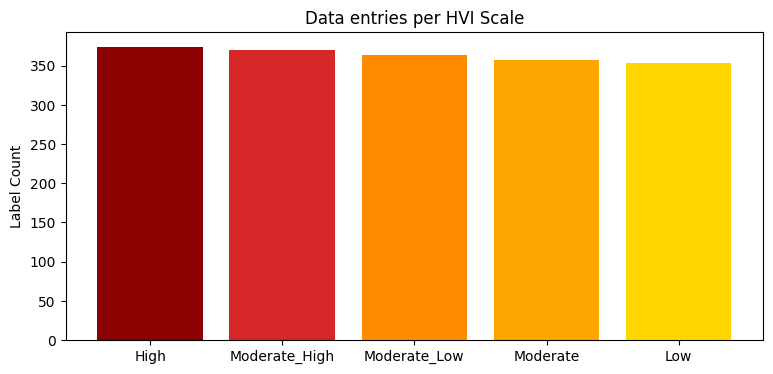

In [27]:
# plot HVI scale to see if data is imbalanced
# data is indeed balanced
hvi_scale = nj_hvi['HVI_Category'].value_counts().reset_index()
fig, ax = plt.subplots()

fig.set_size_inches(9, 4)
labels = hvi_scale['index']
counts = hvi_scale["HVI_Category"]
bar_colors = ['darkred', 'tab:red', 'darkorange', 'orange', 'gold']

ax.bar(labels, counts, color=bar_colors)

ax.set_ylabel('Label Count')
ax.set_title('Data entries per HVI Scale')

plt.show()

In [28]:
municipal_path = rf"D:\Download\HVIprediction\data\nj_municipal\NJ_Municipal_Boundaries_3424.shp"
census_path = rf"D:\Download\HVIprediction\data\nj_census\Census_Blocks_2020_(Govt_TIGER2020_blk20).shp"

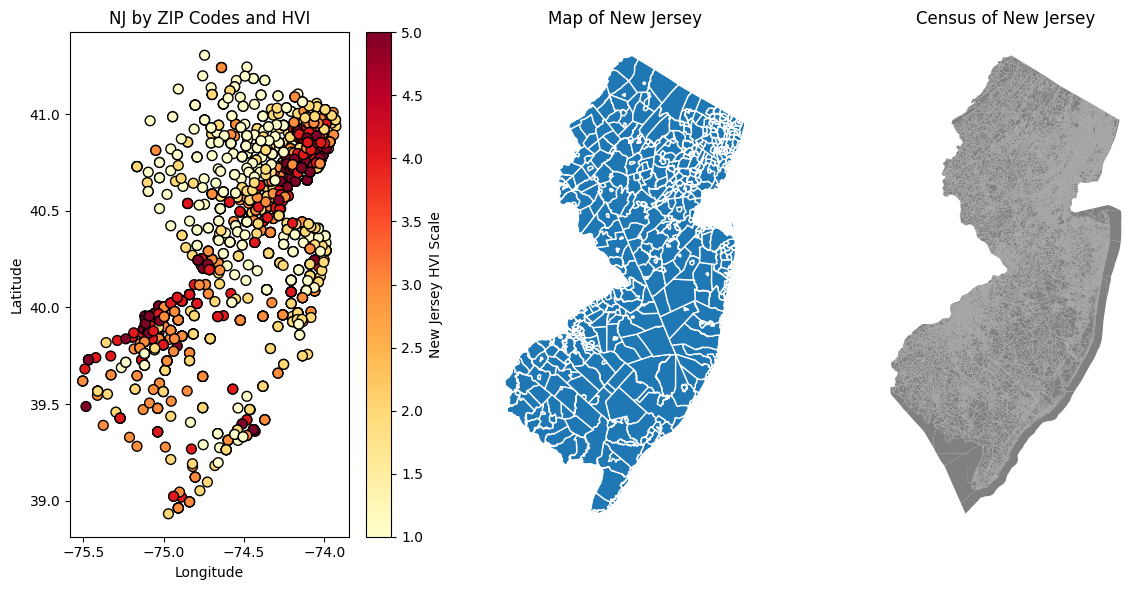

In [29]:
# Load the shapefile
nj = gpd.read_file(municipal_path)
nj_census = gpd.read_file(census_path)

# Create a figure with 2 subplots (side by side)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

# --- First Subplot: HVI Scatter Plot ---
sc = ax1.scatter(nj_hvi_num['Lon'], nj_hvi_num['Lat'], 
                 c=nj_hvi_num['HVI'], cmap='YlOrRd', edgecolor='k', s=50)
cbar = fig.colorbar(sc, ax=ax1, label='New Jersey HVI Scale')

ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('NJ by ZIP Codes and HVI')

# --- Second Subplot: NJ Municipal Boundaries ---
nj.plot(ax=ax2, edgecolor='white')
nj_census.plot(ax=ax3, color='grey', alpha=1)

ax2.set_title("Map of New Jersey")
ax2.set_axis_off()  # Hide axis for better visualization
ax3.set_title("Census of New Jersey")
ax3.set_axis_off()  # Hide axis for better visualization

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure with both plots
plt.show()


### Supervised ordinal classification with labelled HVI data

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, cohen_kappa_score

import krippendorff

##### Correlation matrix and PCA

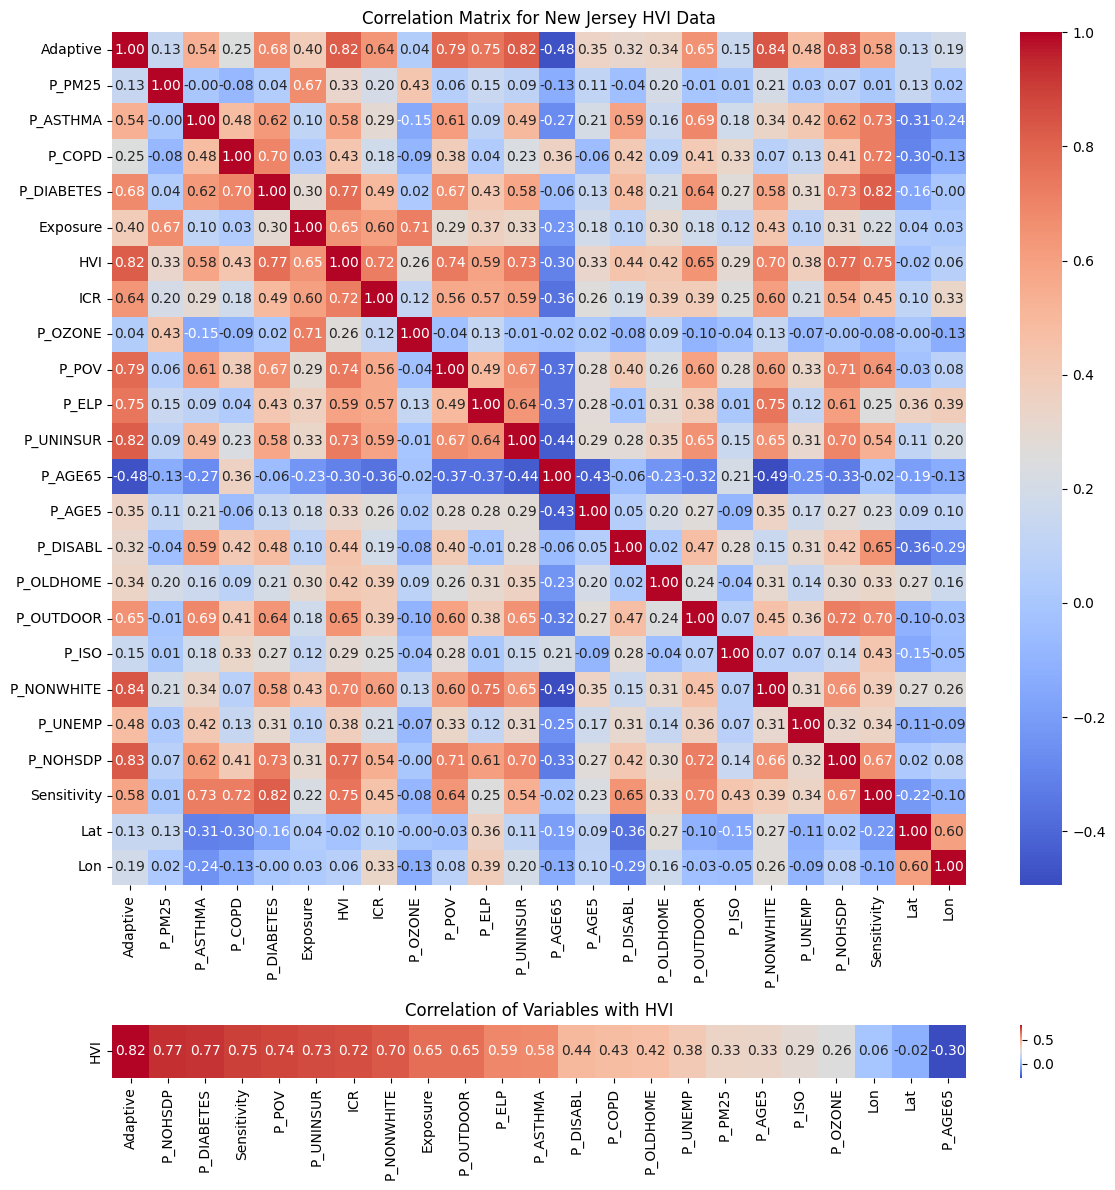

In [31]:
# Compute correlation matrix
def correlation_matrix(df):
	corr_matrix = df.corr()

	# Extract correlation of all variables with HVI
	hvi_corr = corr_matrix[['HVI']].sort_values(by='HVI', ascending=False)[1:].T

	# Create figure with GridSpec to control subplot sizes
	fig = plt.figure(figsize=(12, 12))  # Overall figure size
	gs = GridSpec(2, 1, height_ratios=[16, 1])

	# Create first subplot for full correlation matrix
	ax1 = plt.subplot(gs[0])
	sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax1)
	ax1.set_title("Correlation Matrix for New Jersey HVI Data")

	# Create second subplot for HVI correlation with other variables
	ax2 = plt.subplot(gs[1])
	sns.heatmap(hvi_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax2, cbar=True)
	ax2.set_title("Correlation of Variables with HVI")

	# Adjust layout for better spacing
	plt.tight_layout()
	plt.show()

correlation_matrix(nj_hvi_num)

In [32]:
print(nj_hvi_num.columns)

Index(['Adaptive', 'P_PM25', 'P_ASTHMA', 'P_COPD', 'P_DIABETES', 'Exposure',
       'HVI', 'ICR', 'P_OZONE', 'P_POV', 'P_ELP', 'P_UNINSUR', 'P_AGE65',
       'P_AGE5', 'P_DISABL', 'P_OLDHOME', 'P_OUTDOOR', 'P_ISO', 'P_NONWHITE',
       'P_UNEMP', 'P_NOHSDP', 'Sensitivity', 'Lat', 'Lon'],
      dtype='object')


Covariance Matrix Shape: (15, 15)
Explained Variance Ratio: [0.35825062 0.15169467 0.09834447 0.07527638 0.05744634 0.04930149
 0.04325051 0.03746734 0.02873991 0.02704469 0.01947331]


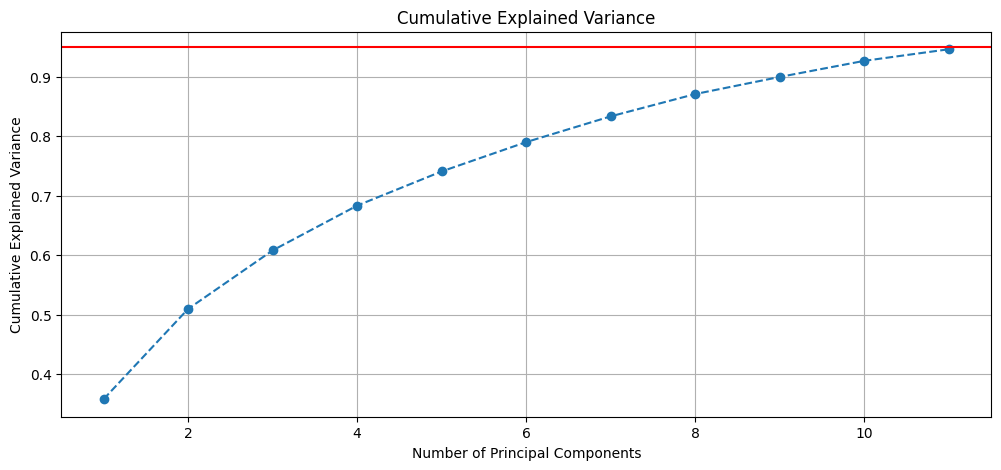

In [33]:
# Select only the ordinal variables
df_ordinal = nj_hvi_num[['P_PM25', 'P_ASTHMA', 'P_COPD', 'P_DIABETES',
       'ICR', 'P_OZONE', 'P_POV', 'P_ELP', 'P_UNINSUR', 'P_AGE65',
       'P_AGE5', 'P_DISABL', 'P_ISO', 'P_UNEMP', 'P_NOHSDP']]

# Standardize the ordinal variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ordinal)

cov_matrix = np.cov(df_scaled.T)  # Compute covariance matrix of transposed data
print("Covariance Matrix Shape:", cov_matrix.shape)
# Perform PCA, keeping the top 5 principal components
pca = PCA(n_components=11)
principal_components = pca.fit_transform(df_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(11)])

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [34]:
feature_importance = pd.DataFrame(pca.components_, columns=df_ordinal.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])
reduced_data = feature_importance.T[[f'PC{i+1}' for i in range(11)]]

In [35]:
X = nj_hvi_num[['P_PM25', 'P_ASTHMA', 'P_COPD', 'P_DIABETES',
       'ICR', 'P_OZONE', 'P_POV', 'P_ELP', 'P_UNINSUR', 'P_AGE65',
       'P_AGE5', 'P_DISABL', 'P_ISO', 'P_UNEMP', 'P_NOHSDP']]
y = nj_hvi_num['HVI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
xgb_reg_s = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg_s.fit(X_train_pca, y_train)
y_pred = xgb_reg_s.predict(X_test_pca)
# Round predictions to the nearest integer and clip to ensure they remain between 1 and 5
y_pred_ordinal = np.clip(np.round(y_pred), 1, 5).astype(int)
non_clipped_pred = np.round(y_pred)

In [36]:
X_train_pca.shape, X_test_pca.shape

((1454, 11), (364, 11))

In [37]:
# Calculate Mean Absolute Error (MAE) and display a classification report
mae = mean_absolute_error(y_test, y_pred_ordinal)
non_clipped_mae = mean_absolute_error(y_test, non_clipped_pred)
print("Mean Absolute Error:", mae)
print("Non-Clipped Mean Absolute Error:", non_clipped_mae)

# Krippendorff's Alpha for ordinal evaluation
ratings = np.array([y_test, y_pred_ordinal])
non_clipped_ratings = np.array([y_test, non_clipped_pred])
pred_vs_real = pd.DataFrame(np.array([y_test, y_pred, y_pred_ordinal, non_clipped_pred]).T, columns=["True", "y_pred", "y_pred_ordinal", "non_clipped_pred"])

print("Krippendorff's alpha: ", krippendorff.alpha(reliability_data=ratings, level_of_measurement="ordinal"))
print("Non-Clipped Krippendorff's alpha: ", krippendorff.alpha(reliability_data=non_clipped_ratings, level_of_measurement="ordinal"))

qwk = cohen_kappa_score(y_test, y_pred_ordinal, weights="quadratic")
non_clipped_qwk = cohen_kappa_score(y_test, non_clipped_pred, weights="quadratic")
print(f"Quadratic Weighted Kappa: {qwk}")
print(f"Non-Clipped Quadratic Weighted Kappa: {non_clipped_qwk}")

pred_vs_real

Mean Absolute Error: 0.2692307692307692
Non-Clipped Mean Absolute Error: 0.2692307692307692
Krippendorff's alpha:  0.9307599264077981
Non-Clipped Krippendorff's alpha:  0.9307599264077981
Quadratic Weighted Kappa: 0.9302957234026754
Non-Clipped Quadratic Weighted Kappa: 0.9302957234026754


,True,y_pred,y_pred_ordinal,non_clipped_pred
0,1.0,1.086272,1.0,1.0
1,5.0,4.929364,5.0,5.0
2,1.0,1.587125,2.0,2.0
3,3.0,3.472605,3.0,3.0
4,2.0,1.911707,2.0,2.0
...,...,...,...,...
359,4.0,4.066529,4.0,4.0
360,5.0,4.554809,5.0,5.0
361,3.0,2.980023,3.0,3.0
362,5.0,4.253280,4.0,4.0


### Semi-supervised ordinal classification with HHI data

In [38]:
pred_df.head()

,P_PM25,P_ASTHMA,P_COPD,P_DIABETES,ICR,P_OZONE,P_POV,P_ELP,P_UNINSUR,P_AGE65,P_AGE5,P_DISABL,P_ISO,P_UNEMP,P_NOHSDP
0,0.000000,9.0,5.3,10.6,3.492341,1.666667,0.169909,0.045173,0.073,0.109,0.056,0.093,0.129677,0.054,0.077
1,0.000000,9.8,6.1,10.3,20.927346,1.666667,0.237009,0.071827,0.098,0.142,0.072,0.106,0.159013,0.060,0.114
2,0.333333,9.3,4.8,8.7,2.204795,1.666667,0.151124,0.052056,0.088,0.134,0.063,0.092,0.155317,0.067,0.081
3,0.333333,8.6,5.2,7.8,0.490865,1.333333,0.017997,0.019190,0.026,0.279,0.048,0.109,0.073437,0.021,0.061
4,0.333333,8.9,5.1,8.5,0.095384,1.000000,0.113195,0.031687,0.044,0.154,0.047,0.080,0.111961,0.051,0.053


In [39]:
X_test_hhi = pca.transform(pred_df)
perturbed_X_test = X_test_hhi + np.random.normal(0, 0.01, X_test_hhi.shape)
y_pred = xgb_reg_s.predict(X_test_hhi)
y_pred_perturbed = xgb_reg_s.predict(perturbed_X_test)
y_pred_ordinal = np.clip(np.round(y_pred), 1, 5).astype(int)
y_pred_ordinal_perturbed = np.clip(np.round(y_pred), 1, 5).astype(int)

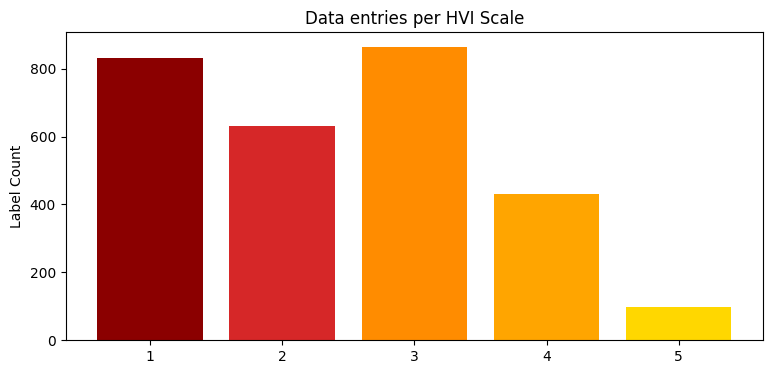

In [40]:
comparison = np.array([y_pred_ordinal, y_pred_ordinal_perturbed])
comparison_df = pd.DataFrame(np.array([y_pred_ordinal, y_pred_ordinal_perturbed]).T, columns=["y_pred_ordinal", "y_pred_ordinal_perturbed"])
comparison_count = comparison_df["y_pred_ordinal"].value_counts().sort_index().reset_index()
fig, ax = plt.subplots()

fig.set_size_inches(9, 4)
labels = comparison_count['index']
counts = comparison_count["y_pred_ordinal"]
bar_colors = ['darkred', 'tab:red', 'darkorange', 'orange', 'gold']

ax.bar(labels, counts, color=bar_colors)

ax.set_ylabel('Label Count')
ax.set_title('Data entries per HVI Scale')

plt.show()

### Supervised Regression with Composite HVI data

In [41]:
# Optimal cluster with elbow method
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
print(regression_data.shape)
regression_data.head()

(1817, 28)


,OBJECTID,GEOID,ICR,P_PM25,P_OZONE,T_SUMMER,P_AGE65,P_AGE5,P_DISABL,P_OLDHOME,P_OUTDOOR,P_ISO,P_ASTHMA,P_DIABETES,P_COPD,P_POV,P_UNEMP,P_ELP,P_NOHSDP,P_NONWHITE,P_UNINSUR,Exposure,Sensitivity,Adaptive,HVI,ZCTA,Lat,Lon
0,1,34015501210,-0.084960,8.3,5.6,75.147778,0.135863,0.071263,0.065336,0.004170,0.174197,0.034183,9.1,7.9,4.5,0.035342,0.037879,0.009357,0.042201,0.095886,0.030417,-0.044100,-0.628184,-0.788493,-0.728310,8080,39.762252,-75.119511
1,2,34015501301,0.128304,8.3,5.6,75.423333,0.160784,0.028852,0.103618,0.774619,0.165563,0.104482,9.5,9.4,6.2,0.093557,0.055838,0.004615,0.025301,0.119328,0.031933,0.104927,0.112011,-0.608961,-0.143824,8071,39.729246,-75.137025
2,3,34015501303,-0.176736,8.3,5.6,75.441111,0.245181,0.048959,0.115463,0.555342,0.142975,0.117579,9.3,10.6,8.1,0.104282,0.048015,0.005675,0.084645,0.094063,0.026963,-0.014752,0.397821,-0.483898,0.024521,8071,39.729246,-75.137025
3,4,34015501900,-0.822916,8.3,5.6,75.125556,0.161548,0.029988,0.140855,0.246795,0.279101,0.063845,10.2,10.5,6.1,0.076736,0.033994,0.040638,0.107023,0.189843,0.030472,-0.371366,0.071654,-0.275176,-0.243763,8343,39.647252,-75.166212
4,5,34015500300,0.447072,8.3,5.6,76.677778,0.136533,0.059142,0.179927,0.656357,0.255927,0.090909,10.5,9.6,6.1,0.095108,0.047797,0.013290,0.099903,0.108145,0.064997,0.562997,0.433358,-0.233662,0.416099,8063,39.869214,-75.186640


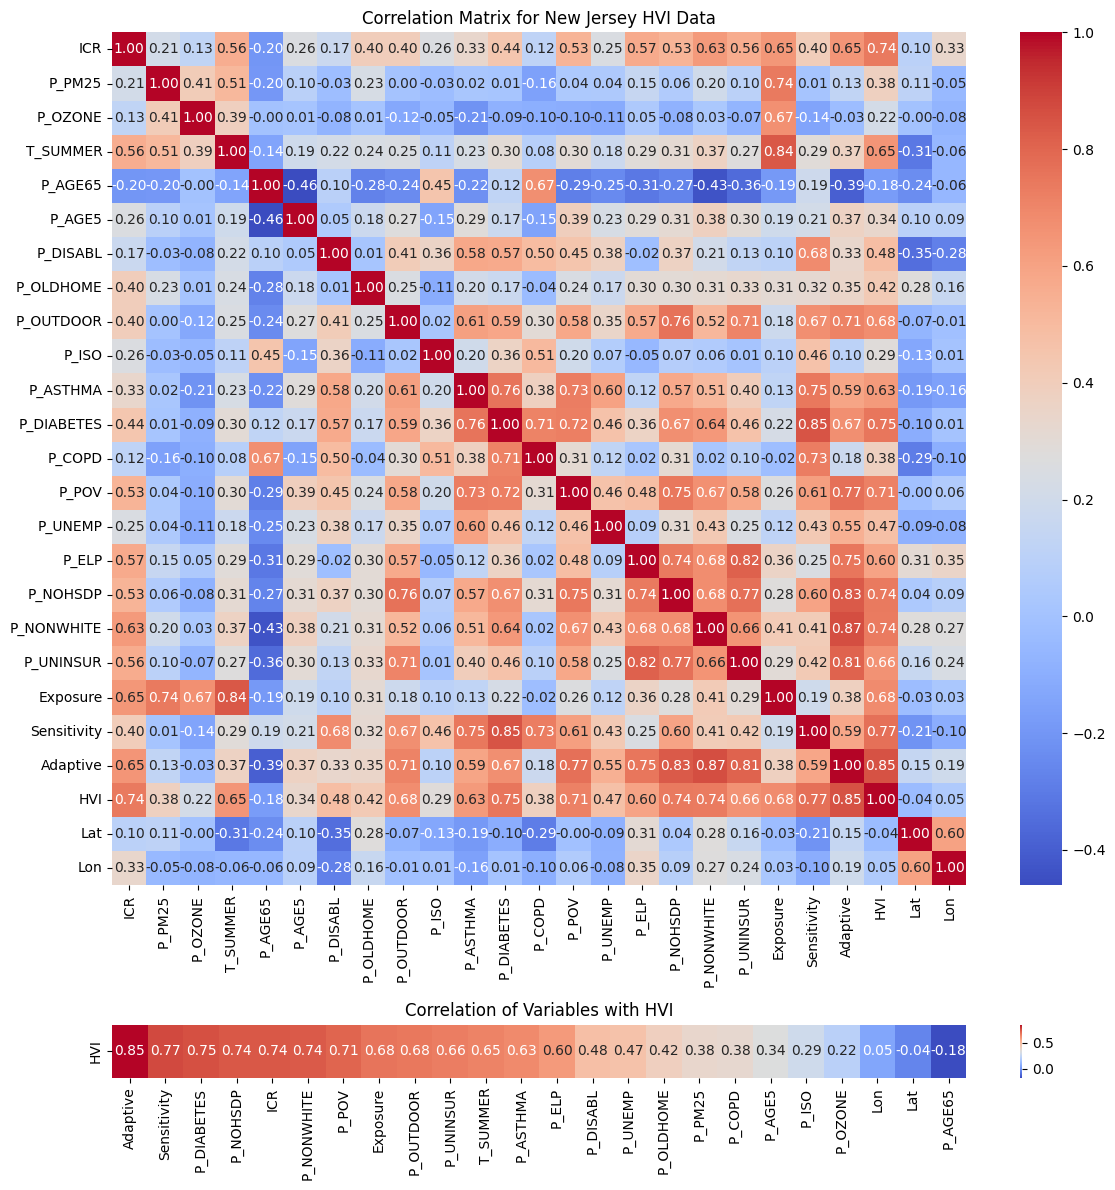

In [43]:
correlation_matrix(regression_data.drop(columns=["OBJECTID", "GEOID", "ZCTA"]))
# Very low correlation between HVI and Lat, Lon

#### XGBoost Regressor

Covariance Matrix Shape: (15, 15)
Explained Variance Ratio: [0.35641596 0.18933352 0.10559689 0.08838398 0.04874138 0.04661019
 0.03724507 0.03535525 0.0260221  0.02266612]


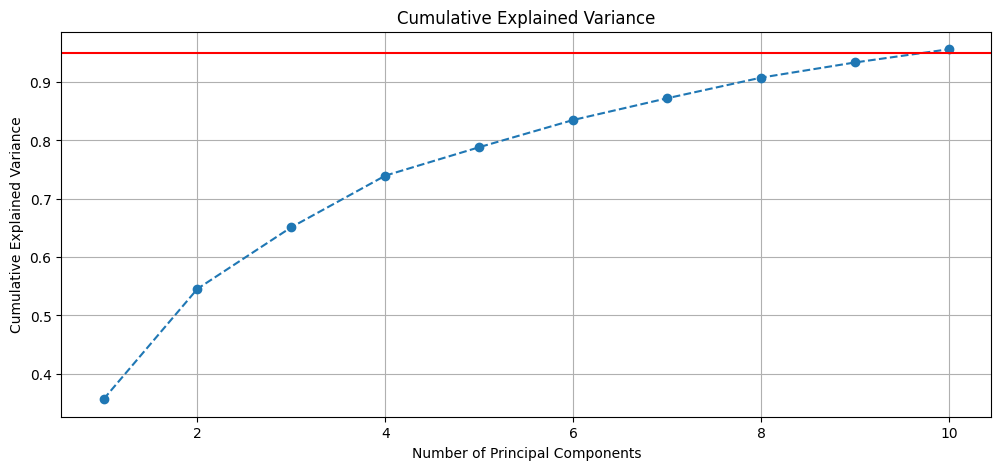

In [44]:
regression_num = regression_data[['P_PM25', 'P_ASTHMA', 'P_COPD', 'P_DIABETES',
       'ICR', 'P_OZONE', 'P_POV', 'P_ELP', 'P_UNINSUR', 'P_AGE65',
       'P_AGE5', 'P_DISABL', 'P_ISO', 'P_UNEMP', 'P_NOHSDP']]

# Standardize the ordinal variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(regression_num)

cov_matrix = np.cov(df_scaled.T)  # Compute covariance matrix of transposed data
print("Covariance Matrix Shape:", cov_matrix.shape)
# Perform PCA, keeping the top 5 principal components
pca1 = PCA(n_components=10)
principal_components = pca1.fit_transform(df_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(10)])

# Explained variance ratio
print("Explained Variance Ratio:", pca1.explained_variance_ratio_)
explained_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [ ]:
# Define the number of splits for K-Fold CV
def kfold_xgboost_regression(regression_train, regression_target, n_splits=5):
	kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

	# Initialize lists to store evaluation metrics
	rmse_scores = []
	r2_scores = []
	mae_scores = []

	for train_index, test_index in kf.split(regression_train):  
		X_train, X_test = regression_train.iloc[train_index], regression_train.iloc[test_index]
		y_train, y_test = regression_target.iloc[train_index], regression_target.iloc[test_index]

		# Standardize the data
		X_train_scaled = scaler.transform(X_train)
		X_test_scaled = scaler.transform(X_test)

		# Apply PCA transformation
		X_train_pca = pca1.transform(X_train_scaled)
		X_test_pca = pca1.transform(X_test_scaled)

		# Train the XGBoost model
		xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
		xgb_reg.fit(X_train_pca, y_train)

		# Predict and evaluate
		y_pred = xgb_reg.predict(X_test_pca)
		
		rmse = np.sqrt(mean_squared_error(y_test, y_pred))
		mae = mean_absolute_error(y_test, y_pred)
		r2 = r2_score(y_test, y_pred)

		rmse_scores.append(rmse)
		r2_scores.append(r2)
		mae_scores.append(mae)

	# Print evaluation results
	print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
	print(f'Average R-Square Score: {np.mean(r2_scores):.4f}')
	print(f'Average MAE: {np.mean(mae_scores):.4f}')

kfold_xgboost_regression(regression_num, regression_data['HVI'])

Average RMSE: 0.1441
Average R-Square Score: 0.9643
Average MAE: 0.1081


#### ANN

#### Ensemble

##### Averaging outputs

#### Semi-supervised regression with HVI Composite data and HHI data

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation results
rmse_scores = []
r2_scores = []
mae_scores = []

# Separate labeled and unlabeled data
X_labeled = ss_regression.loc[ss_regression['HVI'].notna(), X.columns]
y_labeled = ss_regression.loc[ss_regression['HVI'].notna(), 'HVI']
X_unlabeled = ss_regression.loc[ss_regression['HVI'].isna(), X.columns]  # Features of unlabeled data

for train_index, test_index in kf.split(X_labeled):
    # Split labeled data into train and validation sets
    X_train, X_test = X_labeled.iloc[train_index], X_labeled.iloc[test_index]
    y_train, y_test = y_labeled.iloc[train_index], y_labeled.iloc[test_index]

    # Apply PCA transformation
    X_train_pca = pca1.transform(X_train)
    X_test_pca = pca1.transform(X_test)
    X_unlabeled_pca = pca1.transform(X_unlabeled)

    # Step 1: Train Initial Model on Labeled Data
    xgb_reg_ss = XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_reg_ss.fit(X_train_pca, y_train)

    # Step 2: Predict Pseudo-Labels for Unlabeled Data
    y_unlabeled_pred = xgb_reg_ss.predict(X_unlabeled_pca)

    # Step 3: Select High-Confidence Predictions (e.g., within 1 std deviation)
    confidence_threshold = np.std(y_train)  # Define confidence threshold
    high_confidence_mask = np.abs(y_unlabeled_pred - np.mean(y_train)) < confidence_threshold

    # Use only high-confidence pseudo-labels
    X_pseudo = X_unlabeled_pca[high_confidence_mask]
    y_pseudo = y_unlabeled_pred[high_confidence_mask]

    # Step 4: Retrain the Model with Labeled + Pseudo-Labeled Data
    X_combined = np.vstack((X_train_pca, X_pseudo))
    y_combined = np.concatenate((y_train, y_pseudo))

    xgb_reg_ss.fit(X_combined, y_combined)

    # Step 5: Evaluate on Validation Set
    y_pred = xgb_reg_ss.predict(X_test_pca)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    

    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)

# Print Final Evaluation Results
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average R² Score: {np.mean(r2_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')

Average RMSE: 0.2117
Average R² Score: 0.9227
Average MAE: 0.2692


We want to see if the semi-supervised regression model trained on New Jersey data can be applied to predicting the HVI value of Wisconsin

In [ ]:
wi_data = pd

In [ ]:
test_wi_data = ...
y_real = ...
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca1.transform(X_test_scaled)
y_pred_wi = xgb_reg_ss.predict(X_test_pca)


### Clustering with unlabelled data

#### K-means Clustering with Average of percentile score for each category

In [47]:
# clustering_data["STATEFP10"] = clustering_data["STATEFP10"].apply(lambda x: "FL" if x == 12)
clustering_data["STATEFP10"] = clustering_data["STATEFP10"].apply(lambda x: "NJ" if x == 34 else ("CA" if x == 6 else ("FL" if x == 12 else "Other")))
clustering_data.head()

,STATEFP10,POP,HHB_SCORE,SEN_SCORE,SOCIODEM_SCORE,NBE_SCORE
0,NJ,16305,0.2435,0.0,0.4302,0.6330
1,NJ,63031,0.5618,0.0,0.5651,0.6743
2,NJ,47312,0.5572,0.0,0.4925,0.6568
3,NJ,7440,0.3332,0.0,0.3256,0.4432
4,NJ,15269,0.4934,0.0,0.3459,0.4722


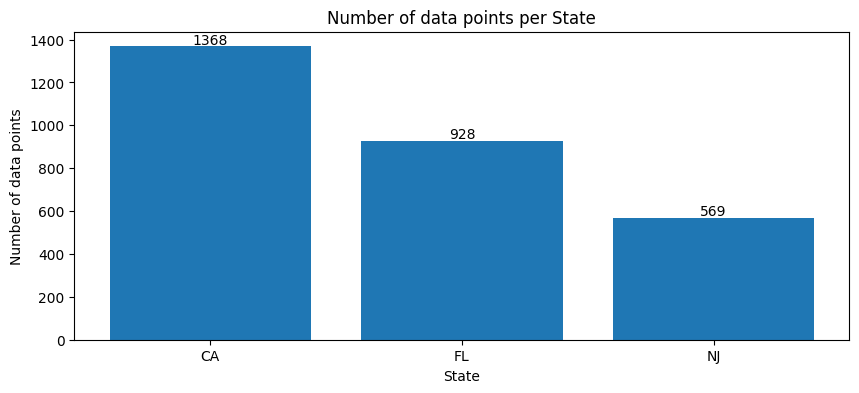

In [48]:
plt.figure(figsize=(10, 4))
plt.bar(clustering_data["STATEFP10"].value_counts().index, clustering_data["STATEFP10"].value_counts().values)
# make number of data points visible on top of the bars
for i, v in enumerate(clustering_data["STATEFP10"].value_counts().values):
	plt.text(i, v + 10, str(v), ha='center')
plt.title("Number of data points per State")
plt.xlabel("State")
plt.ylabel("Number of data points")
plt.show()

Optimal k for State NJ: 5
Optimal k for State FL: 5
Optimal k for State CA: 5


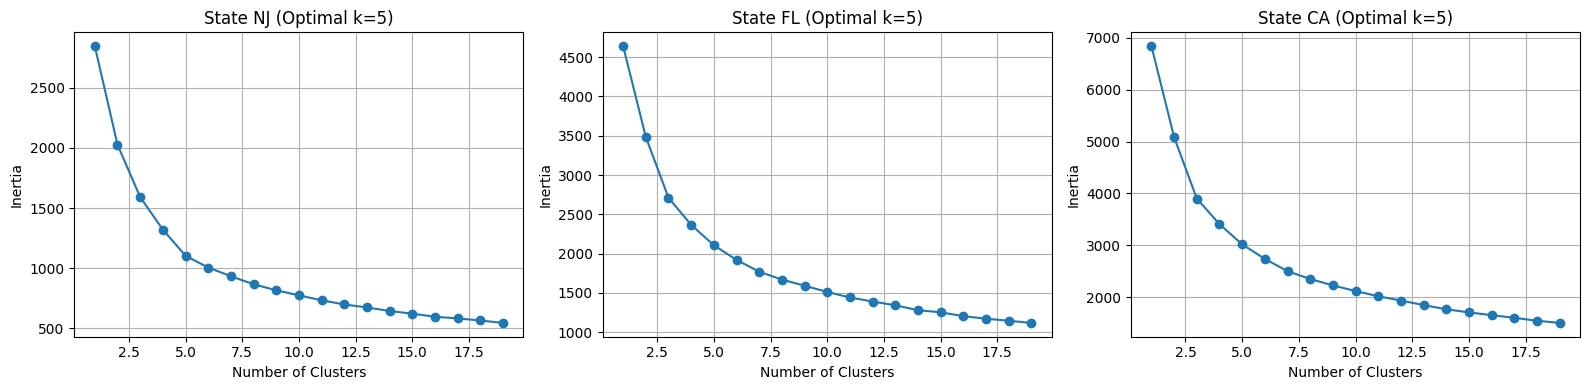

In [49]:
K = 20
scaler = StandardScaler()
states = clustering_data["STATEFP10"].unique()

# Create subplots dynamically based on the number of states
num_states = len(states)
cols = 3  # Number of columns for the subplots
rows = int(np.ceil(num_states / cols))  # Compute required rows

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()  # Flatten in case we have fewer states

for i, state in enumerate(states):
    state_data = clustering_data[clustering_data["STATEFP10"] == state]
    state_data_scaled = scaler.fit_transform(state_data.drop("STATEFP10", axis=1))

    inertia = []
    inertia_mapper = {}
    for k in range(1, K):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(state_data_scaled)
        inertia.append(kmeans.inertia_)
        inertia_mapper[k] = kmeans.inertia_

    kneedle = KneeLocator(list(inertia_mapper.keys()), inertia, curve="convex", direction="decreasing")
    optimal_k = kneedle.elbow
    print(f"Optimal k for State {state}: {optimal_k}")

    # Plot on corresponding subplot
    axes[i].plot(range(1, K), inertia, marker='o', linestyle='-')
    axes[i].set_title(f"State {state} (Optimal k={optimal_k})")
    axes[i].set_xlabel("Number of Clusters")
    axes[i].set_ylabel("Inertia")
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Cluster distribution for state NJ:
0.0     90
1.0    173
2.0     48
3.0    188
4.0     70
Name: Cluster, dtype: int64


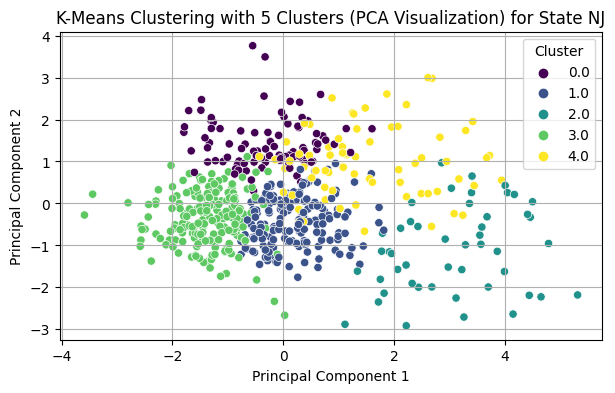

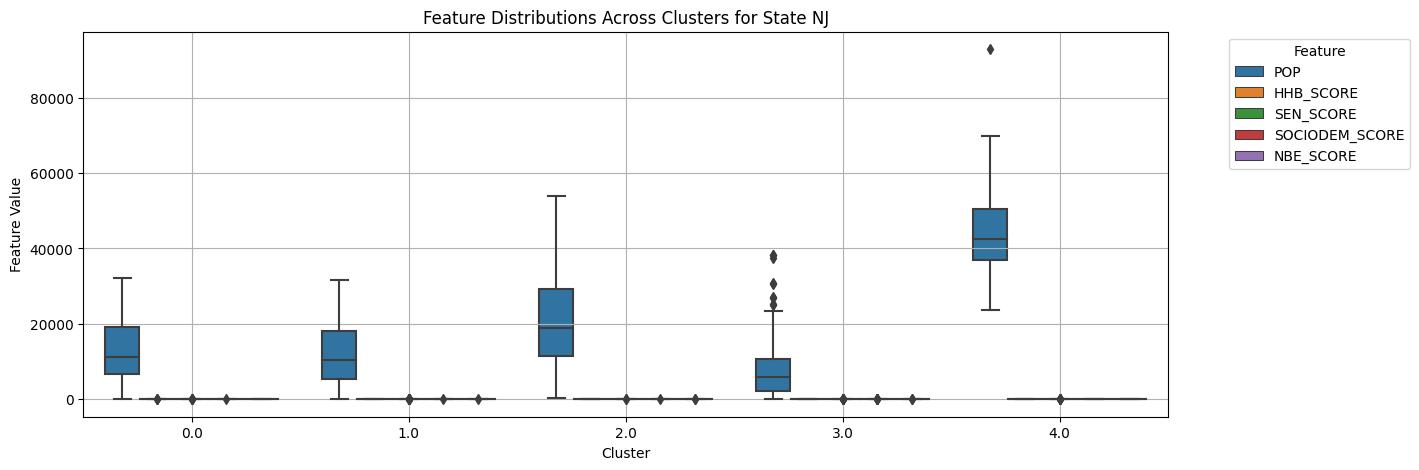

Cluster distribution for state FL:
0.0    165
1.0    161
2.0    208
3.0    219
4.0    175
Name: Cluster, dtype: int64


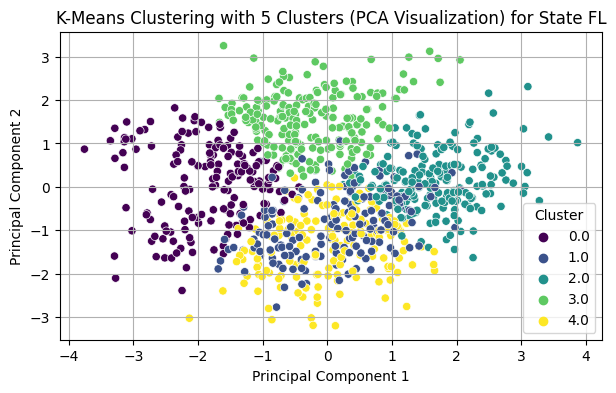

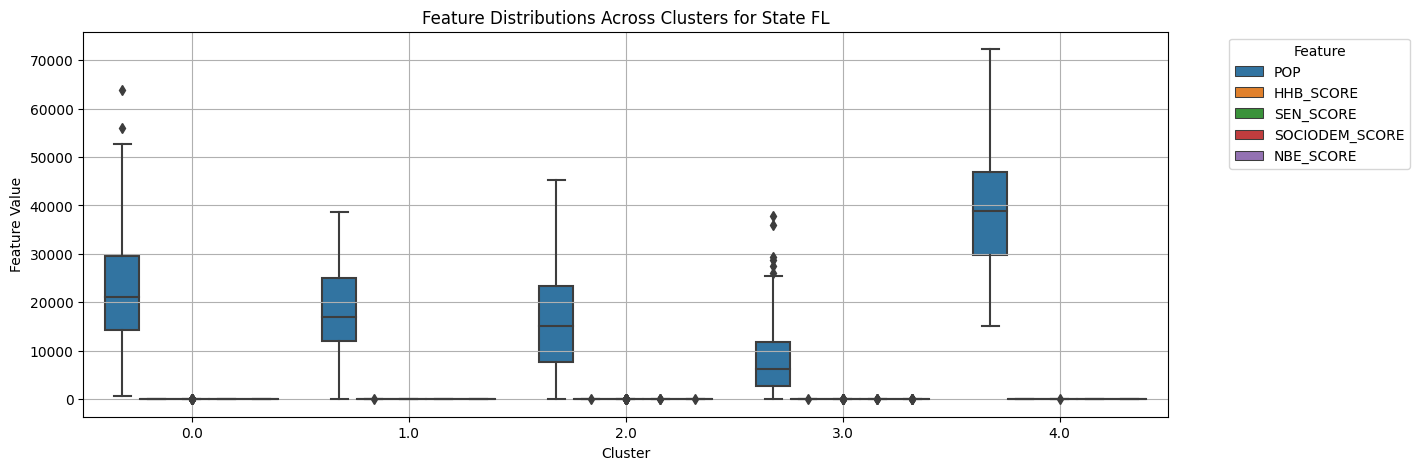

Cluster distribution for state CA:
0.0    324
1.0    303
2.0    253
3.0    270
4.0    218
Name: Cluster, dtype: int64


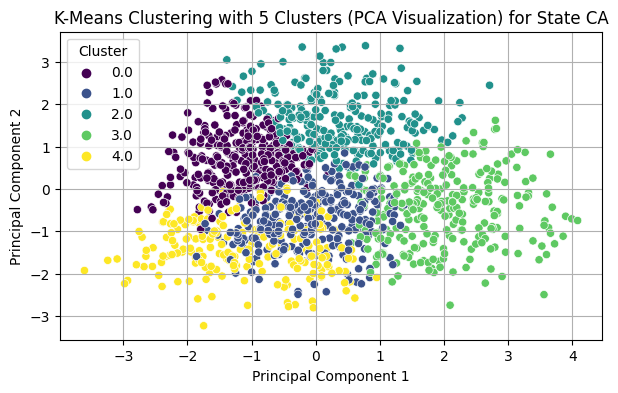

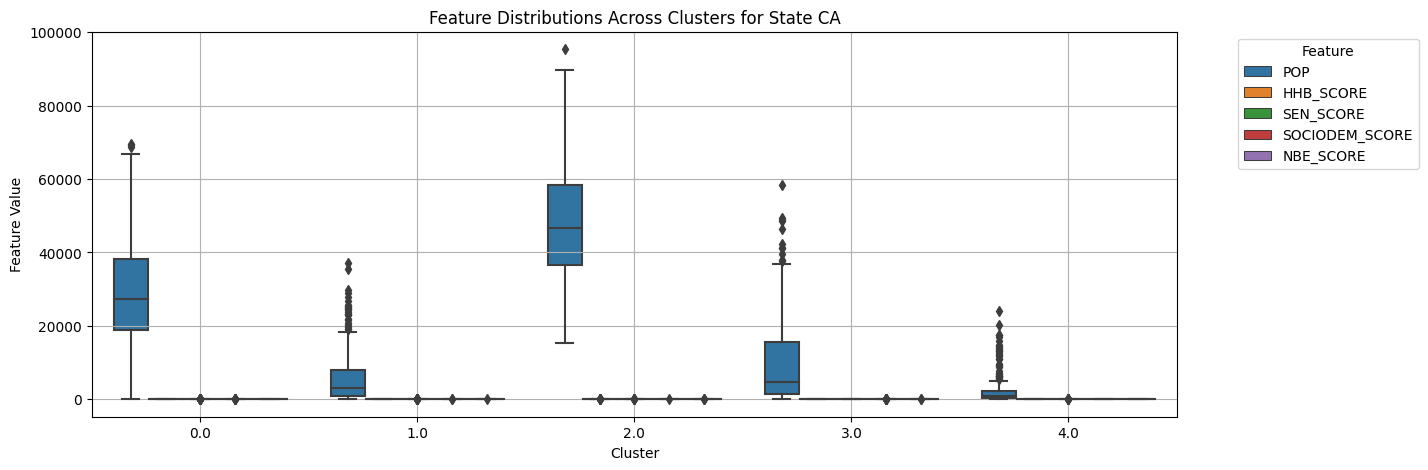

In [50]:
# Define the number of clusters
num_clusters = 5

# Standardize the data (excluding the 'STATEFP10' column)
scaler = StandardScaler()

for _, state in enumerate(clustering_data["STATEFP10"].unique()):
    state_data = clustering_data[clustering_data["STATEFP10"] == state]
    state_data_scaled = scaler.fit_transform(state_data.drop("STATEFP10", axis=1))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    state_data.loc[state_data["STATEFP10"] == state, "Cluster"] = kmeans.fit_predict(state_data_scaled)

    # Display cluster counts
    print(f"Cluster distribution for state {state}:")
    print(state_data[state_data["STATEFP10"] == state]["Cluster"].value_counts().sort_index())

    # Dimensionality reduction for visualization
    pca = PCA(n_components=2)  # Reduce to 2D for visualization
    pca_data = pca.fit_transform(state_data_scaled)

    # Create a DataFrame with PCA results
    state_data.loc[state_data["STATEFP10"] == state, "PCA1"] = pca_data[:, 0]
    state_data.loc[state_data["STATEFP10"] == state, "PCA2"] = pca_data[:, 1]

    # Plot clusters
    plt.figure(figsize=(7, 4))
    sns.scatterplot(
        x="PCA1", y="PCA2", hue="Cluster",
        data=state_data[state_data["STATEFP10"] == state],
        palette="viridis", alpha=1
    )
    plt.title(f"K-Means Clustering with 5 Clusters (PCA Visualization) for State {state}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(14, 5))
    
    clustering_data_melted = state_data.melt(id_vars=["Cluster"], value_vars=state_data.drop(["STATEFP10", "PCA1", "PCA2"], axis=1).columns)
    
    sns.boxplot(x="Cluster", y="value", hue="variable", data=clustering_data_melted)
    plt.title("Feature Distributions Across Clusters for State " + state)
    plt.xlabel("Cluster")
    plt.ylabel("Feature Value")
    plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


Processing State: NJ
Cluster Centers (Original Scale):
            POP  HHB_SCORE  SEN_SCORE  SOCIODEM_SCORE  NBE_SCORE  Cluster
0  12796.877778   0.538182   0.011113        0.380047   0.477337        0
1  12016.693642   0.290461   0.016380        0.467165   0.515777        1
2  19721.500000   0.334685   0.559023        0.633233   0.629748        2
3   7910.265957   0.315178   0.012412        0.315761   0.344196        3
4  44311.100000   0.370160   0.059526        0.483787   0.578013        4

Most Representative Samples for State NJ:
     Cluster    POP  HHB_SCORE  SEN_SCORE  SOCIODEM_SCORE  NBE_SCORE
211        0  17396     0.5162        0.0          0.3652     0.4922
571        1  12320     0.2479        0.0          0.4531     0.5235
151        2  18289     0.3579        0.5          0.6326     0.6369
584        3  10063     0.3011        0.0          0.3287     0.3470
586        4  41153     0.3744        0.0          0.3992     0.5650


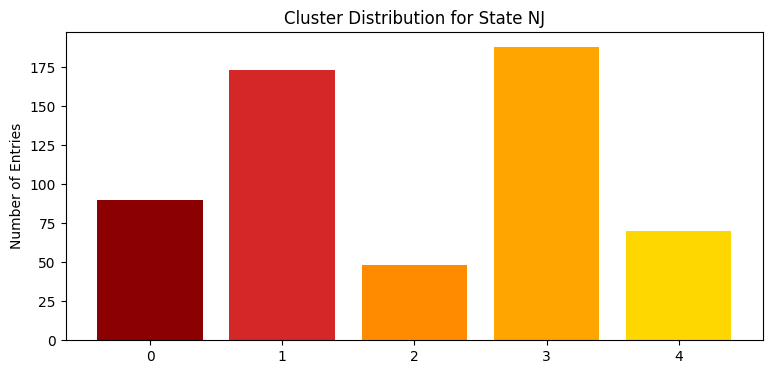

---------------------------------------

Processing State: FL
Cluster Centers (Original Scale):
            POP  HHB_SCORE  SEN_SCORE  SOCIODEM_SCORE  NBE_SCORE  Cluster
0  22412.945455   0.673545   0.566667        0.693197   0.544770        0
1  18010.788820   0.885386   0.153214        0.523388   0.478507        1
2  15981.975962   0.568337   0.052089        0.407048   0.369261        2
3   8160.351598   0.506746   0.484779        0.611402   0.385164        3
4  39373.240000   0.592036   0.081911        0.550862   0.498706        4

Most Representative Samples for State FL:
      Cluster    POP  HHB_SCORE  SEN_SCORE  SOCIODEM_SCORE  NBE_SCORE
882         0  20029     0.6349     0.5000          0.6800     0.5640
1380        1  23338     0.8660     0.1667          0.4898     0.4653
943         2  12869     0.5389     0.0000          0.4278     0.3423
1477        3   7346     0.4636     0.5000          0.6324     0.3780
1529        4  37500     0.5300     0.0000          0.5351     0.45

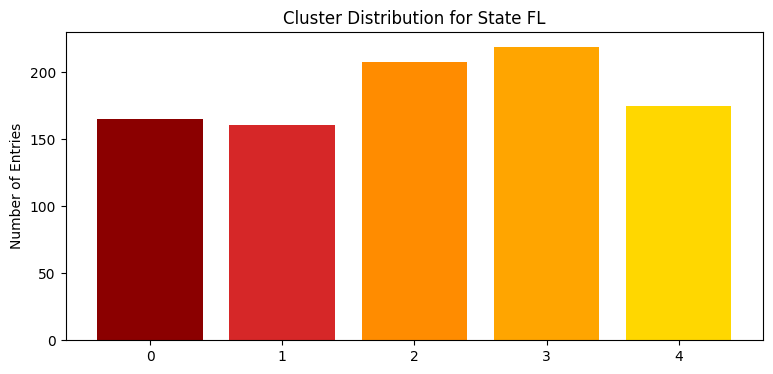

---------------------------------------

Processing State: CA
Cluster Centers (Original Scale):
            POP  HHB_SCORE  SEN_SCORE  SOCIODEM_SCORE  NBE_SCORE  Cluster
0  28577.209877   0.552870   0.012861        0.384913   0.654893        0
1   5704.303630   0.826841   0.072061        0.473524   0.601356        1
2  48710.138340   0.700268   0.106725        0.546744   0.749656        2
3  10441.507407   0.797767   0.540122        0.662113   0.719511        3
4   2595.082569   0.556353   0.197248        0.446489   0.443199        4

Most Representative Samples for State CA:
      Cluster    POP  HHB_SCORE  SEN_SCORE  SOCIODEM_SCORE  NBE_SCORE
2863        0  30902     0.5780     0.0000          0.3584     0.6510
2047        1   8004     0.8551     0.0000          0.4772     0.6081
2306        2  43553     0.6710     0.1667          0.5610     0.7241
2398        3   9591     0.7707     0.5000          0.6868     0.7507
2980        4   1744     0.5436     0.3333          0.4543     0.49

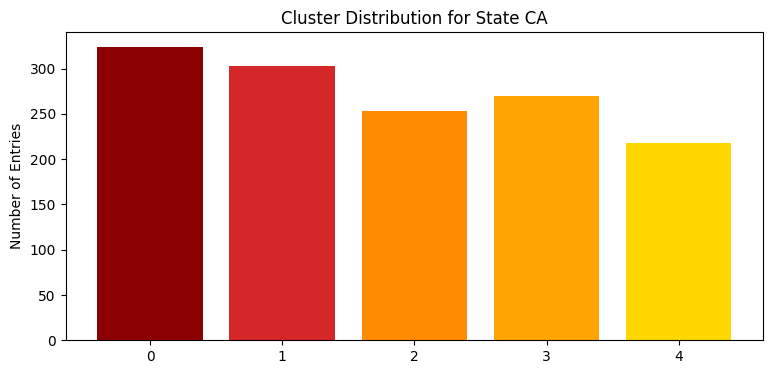

---------------------------------------


In [51]:
# Dictionary to store results
state_representative_samples = {}

# Loop through each state
for _, state in enumerate(clustering_data["STATEFP10"].unique()):
    print(f"\nProcessing State: {state}")

    # Extract state-specific data
    state_data = clustering_data[clustering_data["STATEFP10"] == state].copy()
    
    # Standardize the feature data
    scaler = StandardScaler()
    state_data_scaled = scaler.fit_transform(state_data.drop("STATEFP10", axis=1))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    state_data["Cluster"] = kmeans.fit_predict(state_data_scaled)

    # Inverse transform cluster centers to original scale
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

    # Create a DataFrame for cluster centers
    cluster_centers_df = pd.DataFrame(cluster_centers, columns=state_data.drop(["STATEFP10", "Cluster"], axis=1).columns)
    cluster_centers_df["Cluster"] = range(num_clusters)

    print("Cluster Centers (Original Scale):")
    print(cluster_centers_df)

    # Compute distances of each point to its assigned cluster center
    distances = np.linalg.norm(state_data_scaled - kmeans.cluster_centers_[state_data["Cluster"]], axis=1)
    state_data["DistanceToCenter"] = distances

    # Find the most representative sample for each cluster (smallest distance to centroid)
    representative_samples = state_data.loc[state_data.groupby("Cluster")["DistanceToCenter"].idxmin(), :]
    state_representative_samples[state] = representative_samples

    # Merge the cluster assignments back into original dataset
    state_data_original = state_data.drop(["DistanceToCenter"], axis=1)

    # Print representative samples
    print(f"\nMost Representative Samples for State {state}:")
    print(representative_samples[["Cluster"] + list(state_data.columns[1:6])])

    # Plot cluster distribution for current state
    cluster_distribution = state_data["Cluster"].value_counts().sort_index().reset_index()

    fig, ax = plt.subplots(figsize=(9, 4))
    labels = cluster_distribution['index']
    counts = cluster_distribution['Cluster']
    bar_colors = ['darkred', 'tab:red', 'darkorange', 'orange', 'gold']

    ax.bar(labels, counts, color=bar_colors)

    ax.set_ylabel('Number of Entries')
    ax.set_title(f'Cluster Distribution for State {state}')
    
    plt.show()
    print("---------------------------------------")


#### Hierarchical clustering